<a href="https://colab.research.google.com/github/JamshedAli18/100-Pandas-Puzzles/blob/main/Pipelines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

# Define the data
data = {
    'Gender': ['Male', 'Female', 'Female', 'Male', 'Female', np.nan, 'Male', 'Female', np.nan, 'Male'],
    'Occupation': ['Engineer', 'Doctor', 'Artist', np.nan, 'Engineer', 'Doctor', 'Artist', 'Engineer', 'Doctor', np.nan],
    'Marital_Status': ['Married', 'Single', np.nan, 'Married', 'Single', 'Married', 'Single', np.nan, 'Married', 'Single'],
    'Salary': [70000, 80000, 50000, 60000, 75000, 85000, np.nan, 72000, 78000, np.nan]  # Numeric output column
}

# Create the DataFrame
df = pd.DataFrame(data)


In [3]:
df.head()

,Gender,Occupation,Marital_Status,Salary
0,Male,Engineer,Married,70000.0
1,Female,Doctor,Single,80000.0
2,Female,Artist,NaN,50000.0
3,Male,NaN,Married,60000.0
4,Female,Engineer,Single,75000.0


In [4]:
from sklearn.pipeline import Pipeline

In [5]:
df.isnull().sum()

Gender            2
Occupation        2
Marital_Status    2
Salary            2
dtype: int64

In [19]:
impute_salary  = SimpleImputer()
df['Salary'] = impute_salary.fit_transform(df[['Salary']])

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,y_train,y_test = train_test_split(df.drop('Salary',axis=1),df['Salary'],test_size=0.2)

In [22]:
X_train

,Gender,Occupation,Marital_Status
0,Male,Engineer,Married
4,Female,Engineer,Single
9,Male,NaN,Single
2,Female,Artist,NaN
1,Female,Doctor,Single
7,Female,Engineer,NaN
6,Male,Artist,Single
8,NaN,Doctor,Married


In [23]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [24]:
trf1 = ColumnTransformer([
    ('imputer',SimpleImputer(strategy='most_frequent'),[0,1,2])
],remainder='passthrough')

In [25]:
trf2 = ColumnTransformer([
    ('endcoder',OneHotEncoder(sparse=False,drop='first'),[0,1,2])
])

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
trf3 = LinearRegression()

In [28]:
pipe = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',trf3)
])

In [29]:
pipe.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('imputer',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [0, 1, 2])])),
                ('trf2',
                 ColumnTransformer(transformers=[('endcoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [0, 1, 2])])),
                ('trf3', LinearRegression())])

In [30]:
X_test

,Gender,Occupation,Marital_Status
3,Male,NaN,Married
5,NaN,Doctor,Married


In [31]:
y_test

3    60000.0
5    85000.0
Name: Salary, dtype: float64

In [34]:
y_pred = pipe.predict(X_test)

In [35]:
y_pred

array([71605.76923077, 76394.23076923])

In [37]:
import matplotlib.pyplot as plt

In [40]:
df.isnull().sum()

Gender            2
Occupation        2
Marital_Status    2
Salary            0
dtype: int64

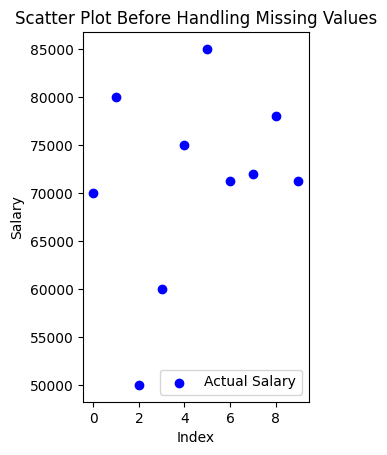

In [45]:
plt.subplot(1, 2, 1)
plt.scatter(range(len(df)), df['Salary'], c='blue', label='Actual Salary')
plt.title('Scatter Plot Before Handling Missing Values')
plt.xlabel('Index')
plt.ylabel('Salary')
plt.legend()

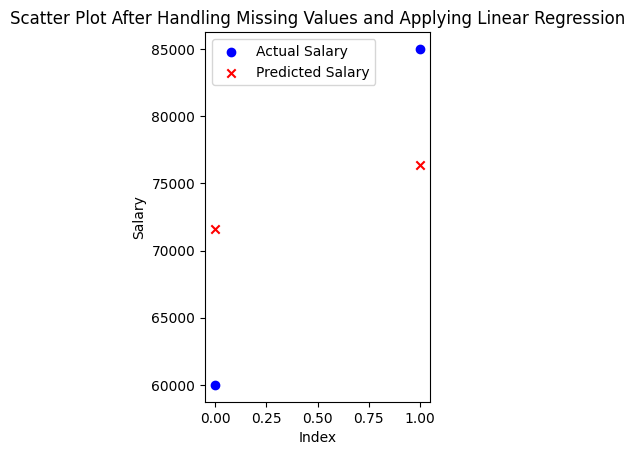

In [44]:
plt.subplot(1, 2, 2)
plt.scatter(range(len(y_test)), y_test, c='blue', label='Actual Salary')
plt.scatter(range(len(y_test)), y_pred, c='red', label='Predicted Salary', marker='x')
plt.title('Scatter Plot After Handling Missing Values and Applying Linear Regression')
plt.xlabel('Index')
plt.ylabel('Salary')
plt.legend()